<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/peaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
from scipy import stats
from scipy import integrate
from scipy import signal
import matplotlib
from matplotlib import pyplot as plt

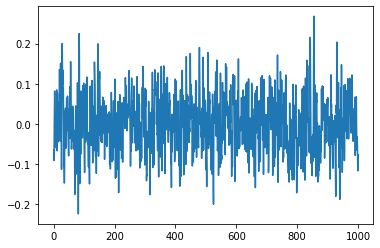

In [42]:
L = 1000
N = 500000
R = .5
dx = L/N
x = np.linspace(0,L,N)

mu = 0.
p_sigma = 2
p_data = np.random.normal(mu, p_sigma,N)    # Populate the grid with random values drawn from a Gaussian with width p_sigma and mean mu 

f_data = np.fft.rfft(p_data)                # Fourier transform of the data
f = np.fft.rfftfreq(p_data.size,dx)         # Sampled Fourier frequencies
k=2.*np.pi*f                            # Sampled Fourier wave numbers

W = np.exp(-0.5*(k*R)**2)
ff_data = W*f_data
pf_data = np.fft.irfft(ff_data)

#plt.plot(x,p_data)
plt.plot(x,pf_data)

In [0]:
peak_pos,peak_h=scipy.signal.find_peaks(pf_data,height=.1)
x_peak_pos = x[peak_pos]
rand_pts = L*np.random.rand(x_peak_pos.shape[0])

In [0]:
peak_peak = [np.abs(p1-p2) for p1 in x_peak_pos for p2 in x_peak_pos if p1 != p2]
peak_rand = [np.abs(p1-p2) for p1 in x_peak_pos for p2 in rand_pts if p1 != p2]
n_pkpk, binedge = np.histogram(peak_peak,50)
n_pkrnad, binedge = np.histogram(peak_rand,50)

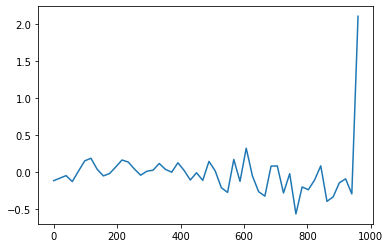

In [47]:
plt.plot(binedge[0:-1],(n_pkpk/n_pkrnad)-1)